In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [8]:
# функция визуализации квадратного массива
def visual_array(array):
    fig, ax = plt.subplots(figsize=(3, 3))  # Устанавливаем размер изображения
    # проходимся по каждому элементу матрицы
    for i in range(array.shape[0]):
        for j in range(array.shape[1]):
            cell_color = 'orange' if array[i, j] == 1 else 'deepskyblue'  # Оранжевый для 1, голубой для -1
            cell = plt.Rectangle((j, array.shape[0] - i - 1), 1, 1, facecolor=cell_color, edgecolor='black')  # Изменяем координаты и добавляем границы
            ax.add_patch(cell)
    
    # добавляем линии сетки
    ax.grid(color='grey', linestyle='-', linewidth=0.1)
    
    # устанавливаем пределы осей и отключаем деления на осях
    ax.set_xlim(0, array.shape[1])
    ax.set_ylim(0, array.shape[0])
    ax.set_aspect('equal')
    ax.axis('off')
    
    # показываем изображение
    plt.show()


# функция преобразования массива в одномерный вектор:
def flatten_array(array):
    flattened_list = []
    for i in range(array.shape[0]):
        for j in range(array.shape[1]):
            flattened_list.append(array[i, j])
    return flattened_list


# функция для создания матрицы весов:
def wei_matrix(samples_1d):
    matrix = np.zeros((64, 4))
    for i in range(64):
        for k in range(4):
            matrix[i, k] = samples_1d[k][i] / 2
    return matrix


# функция для сравнения двух списков
def compare_lists(list1, list2, eps):
    if len(list1) != len(list2):
        return False

    for i in range(len(list1)):
        if abs(list1[i] - list2[i]) > eps:
            return False

    return True


# функция вычисления значений нейронов 1-го слоя y1
def get_y1(input_1d, weis):
    y1 = [0.0, 0.0, 0.0, 0.0]
    for j in range(4):
        elem = 32 
        for i in range(64):
            elem += weis[i, j] * input_1d[i]
        y1[j] = elem
    return y1


# функция вычисления новых значений нейронов 2-го слоя
def renew_y2(y2_old, acc):
    y2_new = [0.0, 0.0, 0.0, 0.0]
    for j in range(4):
        elem = y2_old[j]
        for k in range(4):
            if j != k:
                elem += (-1)*acc*y2_old[k]
        y2_new[j] = max(elem, 0) 
    return y2_new


# функция для создания выходного значения
def get_res(input_1d, weis, eps, acc):
    y2_old = [0.0, 0.0, 0.0, 0.0]
    y1 = get_y1(input_1d, weis)
    y2_old = y1
    i = 2
    while True:            
        y2_new = renew_y2(y2_old, acc)
        if compare_lists(y1, y2_new, eps) or i == 7000:
            return y1, y2_new, i
        else:
            i += 1
            y2_old = y2_new


# функция для нахождения индекса максимального элемента
def find_max(lst):
    max_index = 0
    for i in range(len(lst)):
        if lst[i] > lst[max_index]:
            max_index = i
    return max_index

Образцы в визуале:
Образец 1


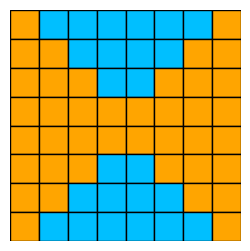

Образец 2


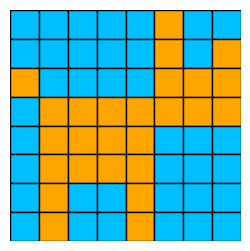

Образец 3


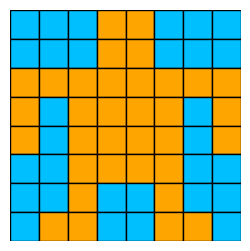

Образец 4


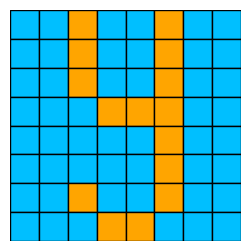

Образцы в виде одномерных векторов:
Образец 1
[1, -1, -1, -1, -1, -1, -1, 1, 1, 1, -1, -1, -1, -1, 1, 1, 1, 1, 1, -1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, -1, 1, 1, 1, 1, 1, -1, -1, -1, -1, 1, 1, 1, -1, -1, -1, -1, -1, -1, 1]
Образец 2
[-1, -1, -1, -1, -1, 1, -1, -1, -1, -1, -1, -1, -1, 1, -1, 1, 1, -1, -1, -1, -1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1, -1, -1, -1, -1, 1, 1, 1, 1, -1, -1, -1, -1, 1, -1, -1, 1, -1, -1, -1, -1, 1, -1, -1, 1, -1, -1, -1]
Образец 3
[-1, -1, -1, 1, 1, -1, -1, -1, -1, -1, -1, 1, 1, -1, -1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1, -1, 1, 1, -1, 1, 1, 1, 1, -1, 1, -1, -1, 1, 1, 1, 1, -1, -1, -1, -1, 1, -1, -1, 1, -1, -1, -1, 1, 1, -1, -1, 1, 1, -1]
Образец 4
[-1, -1, 1, -1, -1, 1, -1, -1, -1, -1, 1, -1, -1, 1, -1, -1, -1, -1, 1, -1, -1, 1, -1, -1, -1, -1, -1, 1, 1, 1, -1, -1, -1, -1, -1, -1, -1, 1, -1, -1, -1, -1, -1, -1, -1, 1, -1, -1, -1, -1, 1, -1, -1, 1, -1, -1, -1, -1, -1, 1, 1, -1, -1, -1]


In [9]:
# загрузка образцов из эксель файла с помощью библиотеки pandas
data_frame = pd.read_excel('samples.xlsx', header=None)

# задание значений точности для вычисления значений нейронов 2-го слоя (eps) и порога останова (acc)
eps = 0.001
acc = 0.25

# преобразование данных в двумерный массив NumPy
samples_array = np.array(data_frame)

side = samples_array.shape[1] # определение размера квадратного массива
samples = list()
for i in range(4):
    samples += [samples_array[side*i:side*(i+1), :]]
print("Образцы в визуале:")
for i in range(4):
    print(f"Образец {i+1}")
    visual_array(samples_array[side*i:side*(i+1), :])

# преобразование образцов в одномерный список
samples_1d = []
for i in range(4):
    samples_1d += [flatten_array(samples[i])]

print("Образцы в виде одномерных векторов:")
for i in range(4):
    print(f"Образец {i+1}", samples_1d[i], sep='\n')


Входное значение:


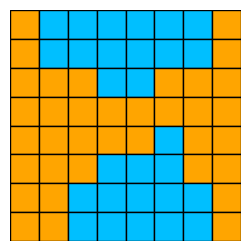

Входной вектор:
[1, -1, -1, -1, -1, -1, -1, 1, 1, -1, -1, -1, -1, -1, -1, 1, 1, 1, 1, -1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, -1, -1, -1, 1, 1, 1, 1, -1, -1, -1, -1, -1, 1, 1, 1, -1, -1, -1, -1, -1, 1]


In [10]:
# загрузка ввода из эксель файла с помощью библиотеки pandas
data_frame = pd.read_excel('input.xlsx', header=None)

# преобразование данных в двумерный массив NumPy
input_array = np.array(data_frame)
print("Входное значение:")
visual_array(input_array)
input_1d = flatten_array(input_array)
print("Входной вектор:", input_1d, sep='\n')

In [11]:
# получение матрицы весов
weis = wei_matrix(samples_1d)
# print(weis.shape)
T = 64 / 2
eps = 0.2
# print(weis)

In [12]:
# цикл с последовательным получением результатов и отслеживанием стабилизации результата
res1, res2, i = get_res(input_1d, weis, eps, acc)
print(res1, res2, f"Число итераций: {i}", f"Входной образец принадлежит классу {find_max(res2) + 1}", sep="\n")


[58.0, 42.0, 32.0, 23.0]
[28.75, 0, 0, 0]
Число итераций: 7000
Входной образец принадлежит классу 1
